# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key +"&q="

#Cities weather data frame
Cities_DF = pd.DataFrame({"City":cities})
Cities_DF["Temperature(F)"] =""
Cities_DF["Humidity(%)"] =""
Cities_DF["Cloudiness(%)"] =""
Cities_DF["Wind Speed(mph)"] =""
Cities_DF["Latitude"]=""
Cities_DF["Longitude"]=""
Cities_DF["Date"]=""
Cities_DF.head()
print("Beginning Data Retrieval")
print("------------------------")

for index, row in Cities_DF.iterrows():
    
   # time.sleep(.8)
    city =row["City"]
    response = requests.get(url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    city_weather_url =response.url
    #print(response.url)

    
    try:
        Cities_DF.loc[index,"Temperature(F)"]=city_weather['main']['temp']
        Cities_DF.loc[index,"Humidity(%)"]=city_weather['main']['humidity']
        Cities_DF.loc[index,"Cloudiness(%)"]=city_weather['clouds']['all']
        Cities_DF.loc[index,"Wind Speed(mph)"]=city_weather['wind']['speed']
        Cities_DF.loc[index,"Latitude"]=city_weather['coord']['lat']
        Cities_DF.loc[index,"Longitude"]=city_weather["coord"]['lon']
        Cities_DF.loc[index,"Date"]=city_weather["dt"]
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

print(Cities_DF)

Beginning Data Retrieval
------------------------
Processing Record 0 | vaini
Processing Record 1 | skjervoy
Processing Record 2 | cloquet
Processing Record 3 | busselton
Processing Record 4 | valparaiso
Processing Record 5 | poum
Processing Record 6 | okhotsk
Processing Record 7 | tuktoyaktuk
Processing Record 8 | faanui
Processing Record 9 | bandarbeyla
Processing Record 10 | carnarvon
Processing Record 11 | grants
Processing Record 12 | yellowknife
Processing Record 13 | port hedland
Processing Record 14 | dikson
Processing Record 15 | punta arenas
Processing Record 16 | ribeira grande
Processing Record 17 | thompson
Processing Record 18 | kavaratti
Processing Record 19 | ponta do sol
Processing Record 20 | mahibadhoo
Processing Record 21 | samusu
City not found... skipping.
Processing Record 22 | taolanaro
City not found... skipping.
Processing Record 23 | lebu
Processing Record 24 | raudeberg
Processing Record 25 | san jose
Processing Record 26 | attawapiskat
City not found... ski

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
Cities_DF.dropna(axis=0, inplace=True)

Cities_DF.to_csv('city_data_output.csv')
Cities_DF.head()

,City,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph),Latitude,Longitude,Date
0,vaini,82.56,83,75,11.5,-21.2,-175.2,1638502952
1,skjervoy,27.88,65,67,15.43,70.0311,20.9714,1638503134
2,cloquet,29.48,84,40,0,46.7216,-92.4594,1638503134
3,busselton,76.05,28,0,7.78,-33.65,115.3333,1638503134
4,valparaiso,56.84,88,20,4.61,-33.0393,-71.6273,1638502935


In [25]:
Cities_DF["Lat"] = pd.to_numeric(Cities_DF["Latitude"],errors='coerce')
Cities_DF["Lng"] = pd.to_numeric(Cities_DF["Longitude"],errors='coerce')
Cities_DF["Max Temp(%)"] = pd.to_numeric(Cities_DF["Temperature(F)"],errors='coerce')
Cities_DF["Humidity"] = pd.to_numeric(Cities_DF["Humidity(%)"],errors='coerce')
Cities_DF["Cloudiness(F)"] = pd.to_numeric(Cities_DF["Cloudiness(%)"],errors='coerce')
Cities_DF["Wind Speed"] = pd.to_numeric(Cities_DF["Wind Speed(mph)"],errors='coerce')
Cities_DF["Date"] = pd.to_numeric(Cities_DF["Date"],errors='coerce')

Cities_DF.describe()

,Date,Lat,Lng,Max Temp(%),Humidity,Cloudiness(F),Wind Speed
count,5.670000e+02,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,1.638503e+09,19.340569,18.889247,52.648148,73.359788,58.421517,7.939788
std,8.417426e+01,33.439002,90.006006,28.761011,19.107775,39.279650,5.743554
min,1.638503e+09,-54.800000,-179.166700,-48.050000,8.000000,0.000000,0.000000
25%,1.638503e+09,-9.621550,-57.369300,33.455000,63.000000,15.000000,3.390000
50%,1.638503e+09,21.346900,22.747400,58.800000,77.000000,75.000000,6.910000
75%,1.638503e+09,48.525000,100.403000,75.710000,88.000000,97.000000,11.455000
max,1.638503e+09,78.218600,179.316700,104.320000,100.000000,100.000000,44.740000


In [27]:
# Get index names for humidity > 100%
index_names = Cities_DF[Cities_DF['Humidity'] >= 100].index

#drop these rows
Cities_DF.drop(index_names,inplace=True)
Cities_DF

#badcitydata = Cities_DF[(Cities_DF['Humidity(%)'] > 100)]
#badcitydata

,City,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph),Latitude,Longitude,Date,Lat,Lng,Max Temp(%),Humidity,Cloudiness(F),Wind Speed
0,vaini,82.56,83,75,11.5,-21.2,-175.2,1.638503e+09,-21.2000,-175.2000,82.56,83.0,75.0,11.50
1,skjervoy,27.88,65,67,15.43,70.0311,20.9714,1.638503e+09,70.0311,20.9714,27.88,65.0,67.0,15.43
2,cloquet,29.48,84,40,0,46.7216,-92.4594,1.638503e+09,46.7216,-92.4594,29.48,84.0,40.0,0.00
3,busselton,76.05,28,0,7.78,-33.65,115.3333,1.638503e+09,-33.6500,115.3333,76.05,28.0,0.0,7.78
4,valparaiso,56.84,88,20,4.61,-33.0393,-71.6273,1.638503e+09,-33.0393,-71.6273,56.84,88.0,20.0,4.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,boa vista,75.18,88,75,6.91,2.8197,-60.6733,1.638503e+09,2.8197,-60.6733,75.18,88.0,75.0,6.91
609,kendari,88.27,57,100,3.29,-3.945,122.4989,1.638503e+09,-3.9450,122.4989,88.27,57.0,100.0,3.29
610,isangel,89.71,58,75,11.5,-19.55,169.2667,1.638503e+09,-19.5500,169.2667,89.71,58.0,75.0,11.50
611,flin flon,9.9,94,100,7.96,54.7682,-101.865,1.638503e+09,54.7682,-101.8650,9.90,94.0,100.0,7.96


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
#  Get the indices of cities that have humidity over 100%.
badcitydata.index

Int64Index([], dtype='int64')

In [30]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# Get index names for humidity > 100%
index_names = Cities_DF[Cities_DF['Humidity'] >= 100].index

#drop these rows
clean_city_data = Cities_DF.drop(index_names,inplace=False)
clean_city_data

#clean_city_data = Cities_DF.join(badcitydata,how='outer')
#clean_city_data = Cities_DF.merge(badcitydata,on=index,inplace=False).query('index!=index')

,City,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph),Latitude,Longitude,Date,Lat,Lng,Max Temp(%),Humidity,Cloudiness(F),Wind Speed
0,vaini,82.56,83,75,11.5,-21.2,-175.2,1.638503e+09,-21.2000,-175.2000,82.56,83.0,75.0,11.50
1,skjervoy,27.88,65,67,15.43,70.0311,20.9714,1.638503e+09,70.0311,20.9714,27.88,65.0,67.0,15.43
2,cloquet,29.48,84,40,0,46.7216,-92.4594,1.638503e+09,46.7216,-92.4594,29.48,84.0,40.0,0.00
3,busselton,76.05,28,0,7.78,-33.65,115.3333,1.638503e+09,-33.6500,115.3333,76.05,28.0,0.0,7.78
4,valparaiso,56.84,88,20,4.61,-33.0393,-71.6273,1.638503e+09,-33.0393,-71.6273,56.84,88.0,20.0,4.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,boa vista,75.18,88,75,6.91,2.8197,-60.6733,1.638503e+09,2.8197,-60.6733,75.18,88.0,75.0,6.91
609,kendari,88.27,57,100,3.29,-3.945,122.4989,1.638503e+09,-3.9450,122.4989,88.27,57.0,100.0,3.29
610,isangel,89.71,58,75,11.5,-19.55,169.2667,1.638503e+09,-19.5500,169.2667,89.71,58.0,75.0,11.50
611,flin flon,9.9,94,100,7.96,54.7682,-101.865,1.638503e+09,54.7682,-101.8650,9.90,94.0,100.0,7.96


In [32]:
clean_city_data.dtypes

City                object
Temperature(F)      object
Humidity(%)         object
Cloudiness(%)       object
Wind Speed(mph)     object
Latitude            object
Longitude           object
Date               float64
Lat                float64
Lng                float64
Max Temp(%)        float64
Humidity           float64
Cloudiness(F)      float64
Wind Speed         float64
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

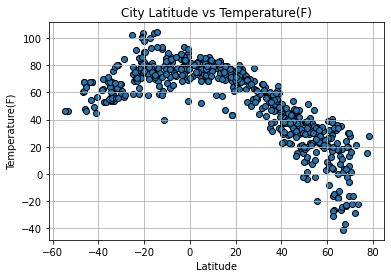

<Figure size 432x288 with 0 Axes>

In [36]:
#Latitude vs Temperature Plot
plt.title("City Latitude vs Temperature(F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid()

plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp(%)"],edgecolors="black")
plt.show()
plt.savefig("./Images/temp.png")

Latitude vs Temperature Scatter Plot Insights
The plot maps 'cities' temperature against their latitude. The curve shows temperature increasing near the equator and dropping further away. The plot shows highers temperatures to right of the equator due to summer in northern hemisphere

## Latitude vs. Humidity Plot

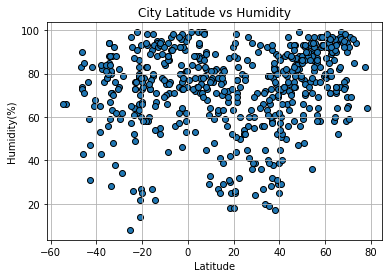

<Figure size 432x288 with 0 Axes>

In [38]:
#Latitude vs Humidity Plot
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black")
plt.show()
plt.savefig("./Images/humidity.png")

Latitude vs Humidity Scatter Plot Insights
The plot maps 'cities' humidity against their latitude. There is no corelation between humidity and latitude

## Latitude vs. Cloudiness Plot

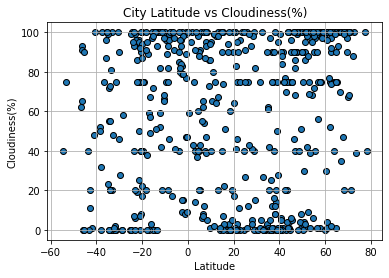

<Figure size 432x288 with 0 Axes>

In [41]:
#Latitude vs Cloudiness Plot
plt.title("City Latitude vs Cloudiness(%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness(F)"],edgecolors="black")
plt.show()
plt.savefig("./Images/cloudiness.png")

Latitude vs Cloudiness Scatter Plot Insights
The plot maps 'cities' cloudiness against their latitude. Cities selected randomly

There is no obvious corelation between cloudiness and latitude. The plots are dense around 0% and 100% cloudiness

## Latitude vs. Wind Speed Plot

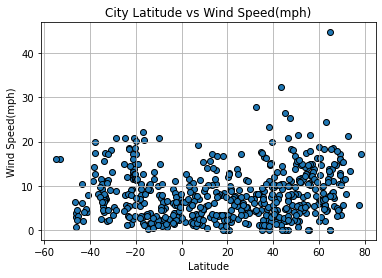

<Figure size 432x288 with 0 Axes>

In [43]:
#Latitude vs Wind Speed Plot
plt.title("City Latitude vs Wind Speed(mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()

plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black")
plt.show()
plt.savefig("./Images/wind.png")

Latitude vs Wind Speed Scatter Plot Insights
The plot maps 'cities' Wind Speed against their latitude. Cities selected randomly

There is no obvious corelation between Windspeed and latitude. The plots are dense around 0to 20 mph windspeed

## Linear Regression

In [45]:
#Create Northern and Southers Hemisphere Data Frames
north_df = Cities_DF.loc[Cities_DF["Lat"] > 0]
south_df = Cities_DF.loc[Cities_DF["Lat"] < 0]


In [48]:
#create Linear regression function
def linearreg(x_values,y_values,EQplotx,EQploty,y_label):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r square if {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(EQplotx,EQploty),fontsize=10,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r square if -0.8826931846984746
y = -1.23x + 90.85


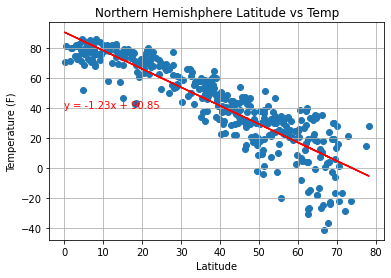

In [49]:
#set the data sets
x_values = north_df["Lat"]
y_values = north_df["Max Temp(%)"]

#position equation
EQplotx  = 0
EQploty = 40

y_label = "Temperature (F)"
plt.title(f'Northern Hemishphere Latitude vs Temp')
          
linearreg(x_values,y_values,EQplotx,EQploty,y_label)

#save file
plt.savefig(f'./output_data/Northern Hemisphere Latitude vs Temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r square if 0.550011977036732
y = 0.54x + 84.34


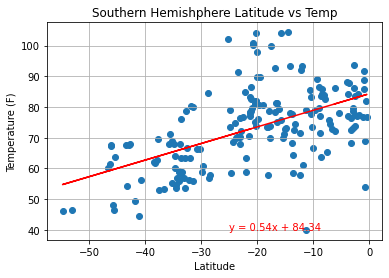

In [50]:
#set the data sets
x_values = south_df["Lat"]
y_values = south_df["Max Temp(%)"]

#position equation
EQplotx  = -25
EQploty = 40

y_label = "Temperature (F)"
plt.title(f'Southern Hemishphere Latitude vs Temp')
          
linearreg(x_values,y_values,EQplotx,EQploty,y_label)

#save file
plt.savefig(f'./output_data/Southern Hemisphere Latitude vs Temp.png')
plt.show()

Northern/Southern vs Temp Linear Regression Insights

The plot maps Northern and Southern 'cities' Temperature against their latitude. Cities selected randomly

There is strong corelation between distance from the equator temperature. The closer the equator, the higher the temperature

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r square if 0.25866936049122213
y = 0.25x + 63.54


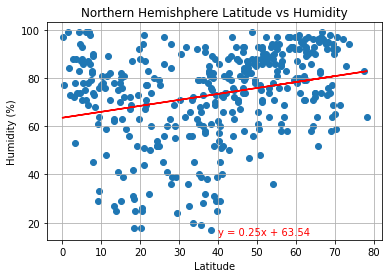

In [51]:
#set the data sets
x_values = north_df["Lat"]
y_values = north_df["Humidity"]

#position equation
EQplotx  = 40
EQploty = 15

y_label = "Humidity (%)"
plt.title(f'Northern Hemishphere Latitude vs Humidity')
          
linearreg(x_values,y_values,EQplotx,EQploty,y_label)

#save file
plt.savefig(f'./output_data/Northern Hemisphere Latitude vs Humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r square if 0.1791409488814178
y = 0.25x + 78.19


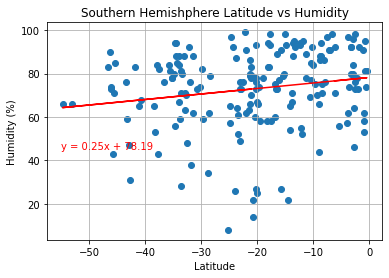

In [52]:
#set the data sets
x_values = south_df["Lat"]
y_values = south_df["Humidity"]

#position equation
EQplotx  = -55
EQploty = 45

y_label = "Humidity (%)"
plt.title(f'Southern Hemishphere Latitude vs Humidity')
          
linearreg(x_values,y_values,EQplotx,EQploty,y_label)

#save file
plt.savefig(f'./output_data/Southern Hemisphere Latitude vs Humidity.png')
plt.show()

Northern/Southern vs Humidity Linear Regression Insights

The plot maps Northern and Southern 'cities' Humidity against their latitude. Cities selected randomly

There is no corelation between latitude and humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r square if 0.22212411763682355
y = 0.44x + 40.88


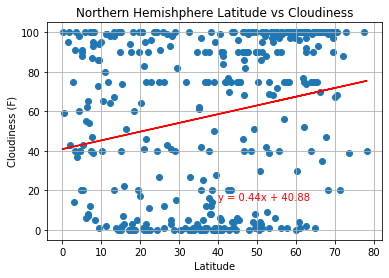

In [53]:
#set the data sets
x_values = north_df["Lat"]
y_values = north_df["Cloudiness(F)"]

#position equation
EQplotx  = 40
EQploty = 15

y_label = "Cloudiness (F)"
plt.title(f'Northern Hemishphere Latitude vs Cloudiness')
          
linearreg(x_values,y_values,EQplotx,EQploty,y_label)

#save file
plt.savefig(f'./output_data/Northern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r square if 0.27535604285630333
y = 0.8x + 75.36


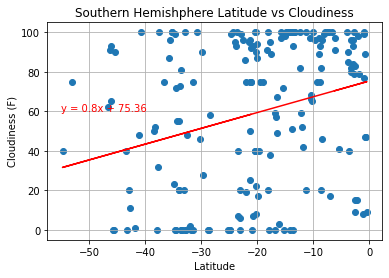

In [54]:
#set the data sets
x_values = south_df["Lat"]
y_values = south_df["Cloudiness(F)"]

#position equation
EQplotx  = -55
EQploty = 60

y_label = "Cloudiness (F)"
plt.title(f'Southern Hemishphere Latitude vs Cloudiness')
          
linearreg(x_values,y_values,EQplotx,EQploty,y_label)

#save file
plt.savefig(f'./output_data/Southern Hemisphere Latitude vs Cloudiness.png')
plt.show()

Northern/Southern Latitude vs Cloudiness Linear Regression Insights

The plot maps Northern and Southern 'cities' Cloudiness against their latitude. Cities selected randomly

There is no corelation between latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r square if 0.27875822336361955
y = 0.08x + 4.96


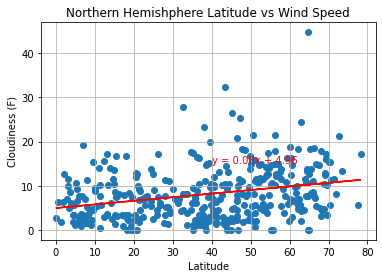

In [55]:
#set the data sets
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]

#position equation
EQplotx  = 40
EQploty = 15

y_label = "Cloudiness (F)"
plt.title(f'Northern Hemishphere Latitude vs Wind Speed')
          
linearreg(x_values,y_values,EQplotx,EQploty,y_label)

#save file
plt.savefig(f'./output_data/Northern Hemisphere Latitude vs Wind Speed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r square if -0.2236762142526281
y = -0.09x + 5.87


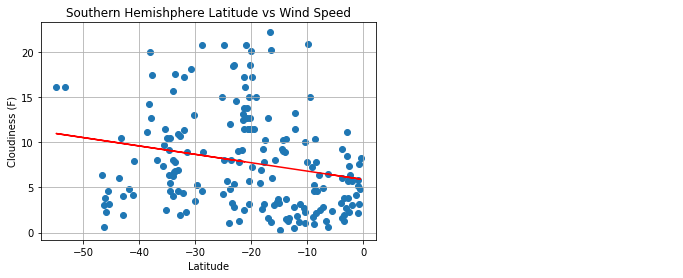

In [56]:
#set the data sets
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]

#position equation
EQplotx  = 40
EQploty = 15

y_label = "Cloudiness (F)"
plt.title(f'Southern Hemishphere Latitude vs Wind Speed')
          
linearreg(x_values,y_values,EQplotx,EQploty,y_label)

#save file
plt.savefig(f'./output_data/Southern Hemisphere Latitude vs Wind Speed.png')
plt.show()

Northern/Southern Latitude vs Windspeed Linear Regression Insights

The plot maps Northern and Southern 'cities' Wind Speed against their latitude. Cities selected randomly

There is no corelation between latitude and wind speed